<a href="https://colab.research.google.com/github/PabloVD18/Actividades-IA/blob/main/A3%202077623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pablo de Jesus Villafaña Domínguez 2077623 LMV N1

In [ ]:
#Importamos librerias
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [ ]:
#Descargamos set de datos MNIST
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


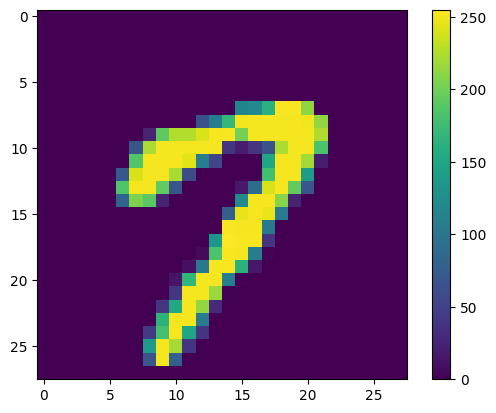

In [ ]:
plt.figure()
plt.imshow(train_images[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Damos nombre a las clases
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

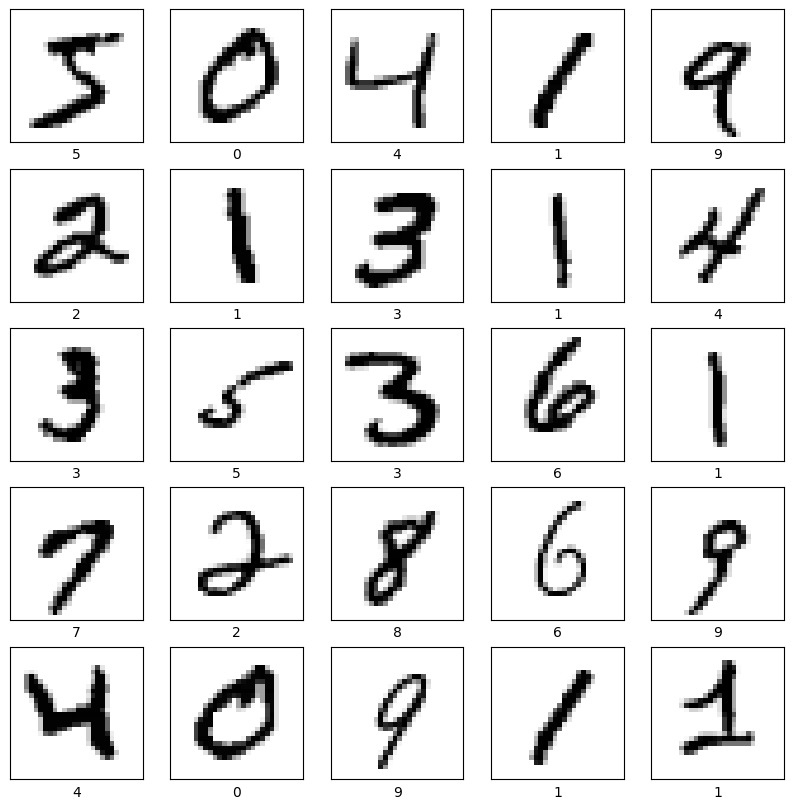

In [ ]:
#Le pedimos que nos muestre 25 imagenes de set de datos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Le damos los datos de la capa de entrada, capas ocultas y capas de salida
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Le damos la cantidad de epocas para el entrenamiento
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2640 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1150 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0791 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0599 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0809 - accuracy: 0.9784 - 715ms/epoch - 2ms/step

Test accuracy: 0.9783999919891357


**Vemos que tiene efectividad del 97.9%, dar el casi 100% se puede deber a que le dimos 10 epocas de entrenamiento porque cuando pusimos 8 nos dio 72%**

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#Definimos la funcion para que nos de una prediccion con grafica
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

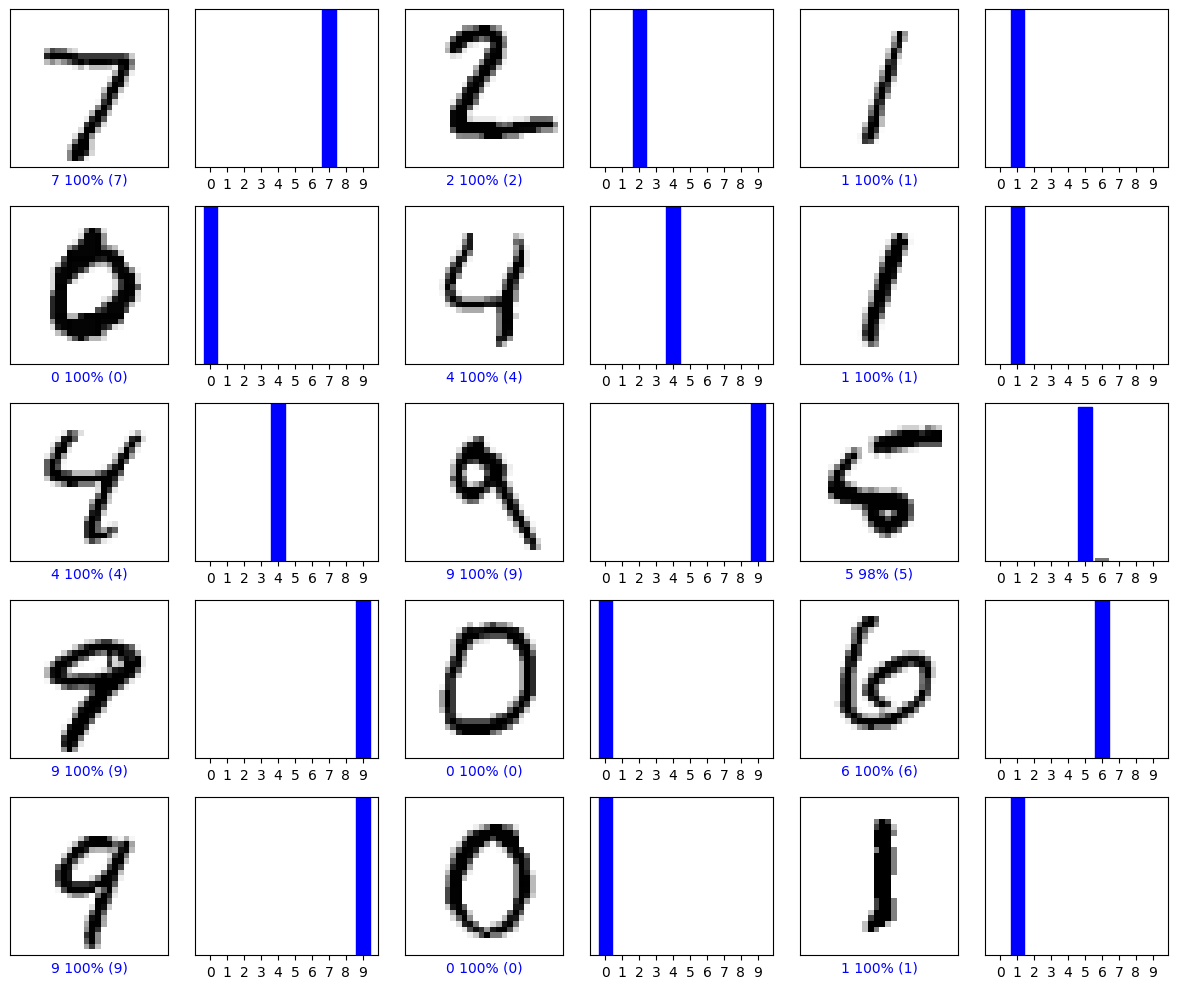

In [ ]:
#Le pedimos que nos muestre 15 predicciones con sus estadisticas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **En conclusion con estos ultimos datos vimos como acertó el 100% de las imagenes mostradas, con las 10 epocas que le dimos tuvo un buen entrenamiento ya que vimos la efectividad que tuvo pero seguramente, al ser una red neuronal no convolucional, si metemos una imagen con un numero en otra posición lo falle, debido que estas redes suelen llegar a aprenderse las imagenes y no las caracteristicas de ellas**